## Binary Image Classification Models

**Project Task:**

**Wildlife Image Classification between two classes: Bobcats and Panthers** 


Image dataset comes from UCF's Florida Wildlife Camera Traps Dataset:
https://www.crcv.ucf.edu/research/projects/florida-wildlife-camera-trap-dataset/




### Imports and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import Callback, CSVLogger
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
drive.mount('/content/drive')
np.random.seed(48)

Mounted at /content/drive


In [3]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train',
    target_size=(256,256),
    class_mode = 'binary'
    )
test = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test',
    target_size=(256,256),
    class_mode = 'binary'
    )

Found 3542 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


In [5]:
train.class_indices, test.class_indices

({'Bobcats': 0, 'Panthers': 1}, {'Bobcats': 0, 'Panthers': 1})

### Base Model

In [ ]:
basemodel = Sequential()
basemodel.add(Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Conv2D(64, (3,3), activation='relu'))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Flatten())
basemodel.add(Dense(28, activation='relu'))
basemodel.add(Dense(1, activation='sigmoid'))

In [ ]:
# https://keras.io/api/callbacks/
# https://keras.io/api/callbacks/model_checkpoint/

base_callbacks = [
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = '/content/drive/MyDrive/Wildlife Capstone/callbacks/basemodel',
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      'basemodel.log', 
                      separator=',', 
                      append=True
                      )
]



In [ ]:
basemodel.compile(
    optimizer='adam',
    loss='bce',
    metrics=['accuracy', 'Precision'])

In [ ]:
history = basemodel.fit(train, 
                        validation_data = test, 
                        validation_batch_size=32, 
                        batch_size=32,
                        epochs=5,
                        callbacks = base_callbacks, 
                        verbose=1
                        )

Epoch 1/5
111/111 [==============================] - 1066s 9s/step - loss: 0.7691 - accuracy: 0.5954 - precision: 0.6020 - val_loss: 0.6481 - val_accuracy: 0.5491 - val_precision: 0.5309
Epoch 2/5
111/111 [==============================] - 198s 2s/step - loss: 0.4516 - accuracy: 0.7750 - precision: 0.7757 - val_loss: 0.6090 - val_accuracy: 0.6804 - val_precision: 0.6757
Epoch 3/5
111/111 [==============================] - 191s 2s/step - loss: 0.2775 - accuracy: 0.8772 - precision: 0.8888 - val_loss: 0.7978 - val_accuracy: 0.6353 - val_precision: 0.6079
Epoch 4/5
111/111 [==============================] - 191s 2s/step - loss: 0.1690 - accuracy: 0.9339 - precision: 0.9441 - val_loss: 1.2746 - val_accuracy: 0.6074 - val_precision: 0.5741
Epoch 5/5
111/111 [==============================] - 190s 2s/step - loss: 0.1628 - accuracy: 0.9385 - precision: 0.9512 - val_loss: 1.3390 - val_accuracy: 0.6538 - val_precision: 0.6150


In [ ]:
history.history

{'accuracy': [0.5954263210296631,
  0.7749859094619751,
  0.8771880269050598,
  0.9339356422424316,
  0.9384528398513794],
 'loss': [0.7690831422805786,
  0.4515506327152252,
  0.27745839953422546,
  0.16896945238113403,
  0.16283223032951355],
 'precision': [0.6020193696022034,
  0.7757009267807007,
  0.8888306021690369,
  0.9440928101539612,
  0.9511677026748657],
 'val_accuracy': [0.5490716099739075,
  0.6803713440895081,
  0.6352785229682922,
  0.6074270606040955,
  0.6538461446762085],
 'val_loss': [0.648136556148529,
  0.6090049743652344,
  0.7977756857872009,
  1.2745659351348877,
  1.3390018939971924],
 'val_precision': [0.5308988690376282,
  0.6756756901741028,
  0.60792076587677,
  0.5740740895271301,
  0.6149532794952393]}

In [ ]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
# basemodel.save('/content/drive/MyDrive/Wildlife Capstone/models/base_model')

In [ ]:
# basemodel.save_weights('/content/drive/MyDrive/Wildlife Capstone/models/base_model_weights')

In [ ]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 28)                6

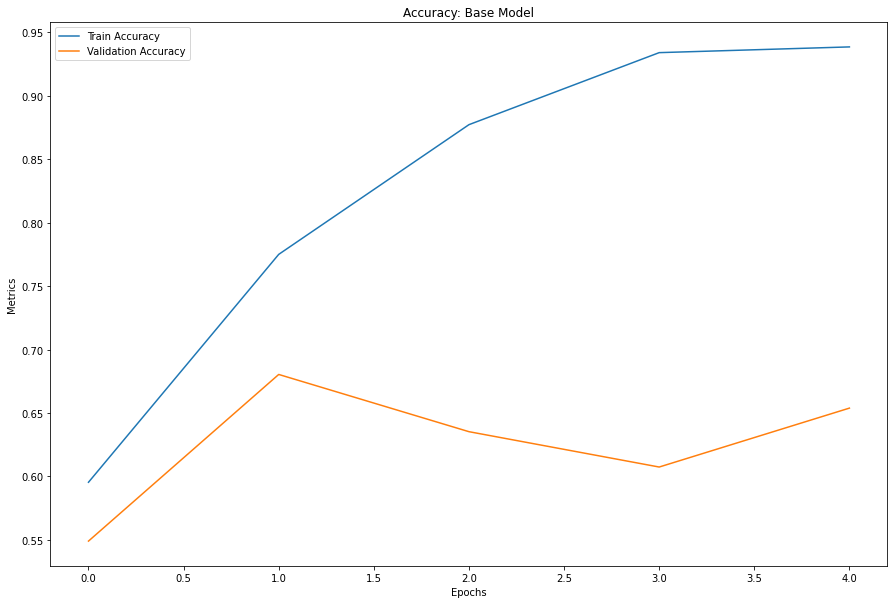

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Base Model');

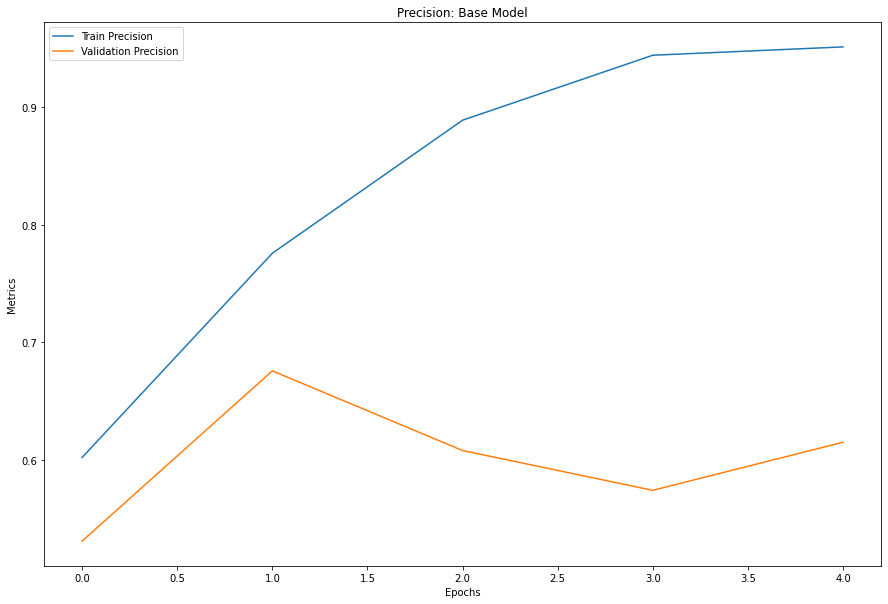

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Base Model');

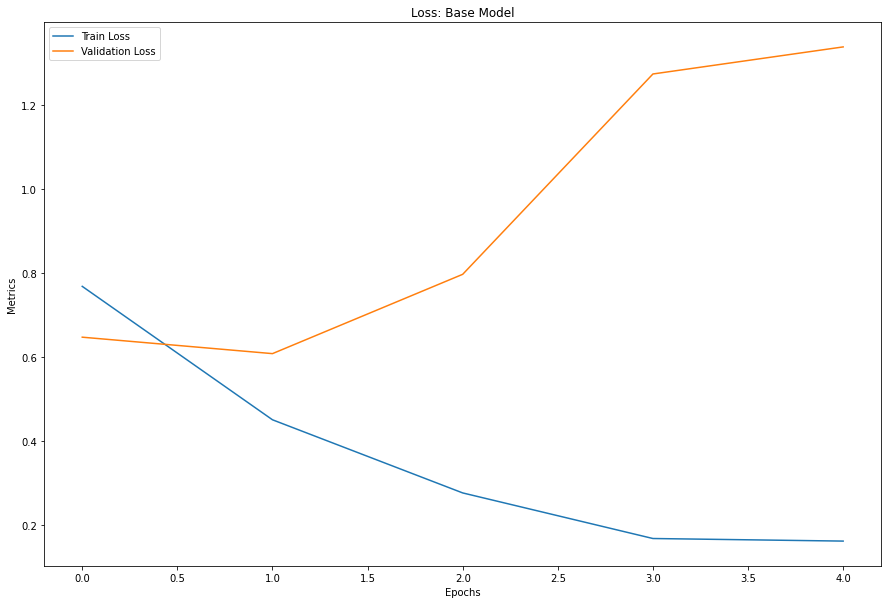

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: Base Model');

In [ ]:
basemodel.evaluate(test)

24/24 [==============================] - 28s 1s/step - loss: 1.3390 - accuracy: 0.6538 - precision: 0.6150


[1.3390018939971924, 0.6538461446762085, 0.6149532794952393]

In [ ]:
base_preds = basemodel.predict(test)

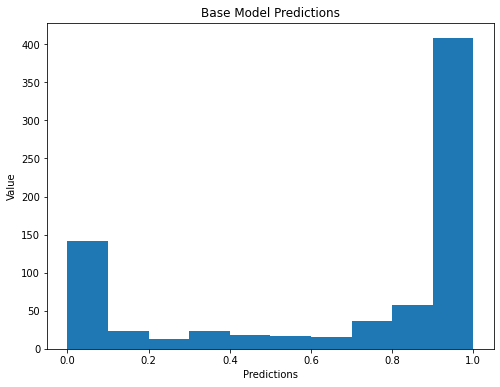

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Base Model Predictions')
plt.xlabel('Predictions')
plt.ylabel('Value')
plt.hist(base_preds);

### Model 1 

In [ ]:
model1 = Sequential()
model1.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(48, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(
    optimizer='adam',
    loss='bce',
    metrics=['accuracy', 'Precision', ])


In [ ]:
model1_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                  ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = '/content/drive/MyDrive/Wildlife Capstone/callbacks/model1',
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      'model1.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
history_1 = model1.fit(train, 
                     validation_data = test, 
                     validation_batch_size=32,
                     batch_size=32,
                     epochs=50,
                     callbacks=[model1_callbacks], 
                     verbose=1)

Epoch 1/50
111/111 [==============================] - 192s 2s/step - loss: 0.6533 - accuracy: 0.6231 - precision: 0.6186 - val_loss: 0.5831 - val_accuracy: 0.7294 - val_precision: 0.7761
Epoch 2/50
111/111 [==============================] - 189s 2s/step - loss: 0.4691 - accuracy: 0.7612 - precision: 0.7646 - val_loss: 0.7118 - val_accuracy: 0.7666 - val_precision: 0.9062
Epoch 3/50
111/111 [==============================] - 191s 2s/step - loss: 0.3150 - accuracy: 0.8583 - precision: 0.8691 - val_loss: 0.8082 - val_accuracy: 0.7056 - val_precision: 0.6929
Epoch 4/50
111/111 [==============================] - 189s 2s/step - loss: 0.2250 - accuracy: 0.9051 - precision: 0.9150 - val_loss: 0.9034 - val_accuracy: 0.7069 - val_precision: 0.7063
Epoch 5/50
111/111 [==============================] - 189s 2s/step - loss: 0.1533 - accuracy: 0.9373 - precision: 0.9496 - val_loss: 0.9414 - val_accuracy: 0.6764 - val_precision: 0.6535
Epoch 6/50
111/111 [==============================] - 191s 2s/ste

In [ ]:
history_1.history

{'accuracy': [0.6230943202972412,
  0.761151909828186,
  0.858272135257721,
  0.9051383137702942,
  0.9373235702514648,
  0.9576510190963745,
  0.9748729467391968,
  0.9802371263504028,
  0.9904009103775024,
  0.9957650899887085,
  0.9974590539932251],
 'loss': [0.6533035039901733,
  0.4690665900707245,
  0.3150337040424347,
  0.22498199343681335,
  0.15334779024124146,
  0.10210084170103073,
  0.07503242045640945,
  0.051211852580308914,
  0.03377183899283409,
  0.01558403018862009,
  0.012286268174648285],
 'precision': [0.6186406016349792,
  0.7645606994628906,
  0.8691344857215881,
  0.9150052666664124,
  0.9496288299560547,
  0.9667370915412903,
  0.9810625910758972,
  0.9837696552276611,
  0.9926778078079224,
  0.9963484406471252,
  0.9984334111213684],
 'val_accuracy': [0.7294429540634155,
  0.7665782570838928,
  0.7055702805519104,
  0.7068965435028076,
  0.6763925552368164,
  0.7122015953063965,
  0.6485410928726196,
  0.7241379022598267,
  0.663129985332489,
  0.7214854359626

In [ ]:
# model1.save('/content/drive/MyDrive/Wildlife Capstone/models/model1')

In [ ]:
# model1.save_weights('/content/drive/MyDrive/Wildlife Capstone/models/base_model_weights')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)      

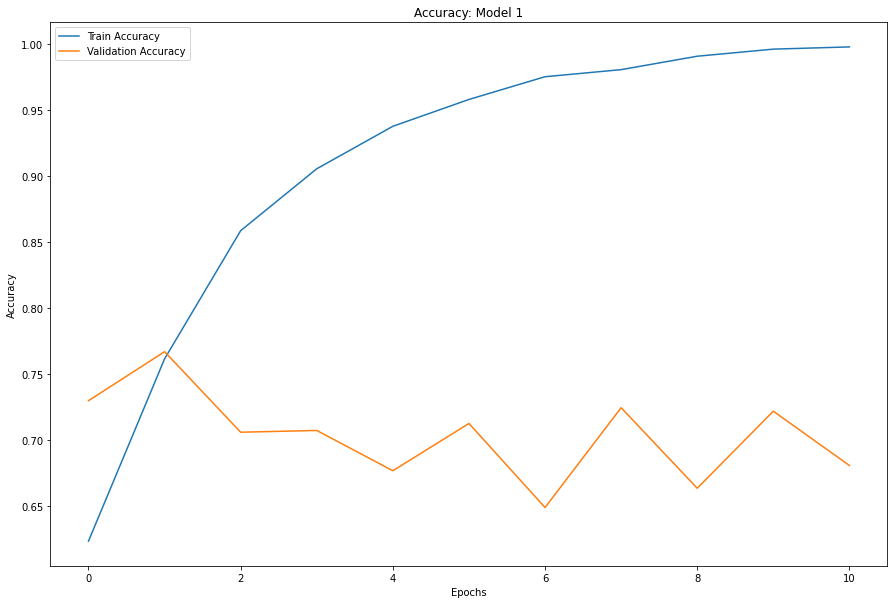

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Model 1');

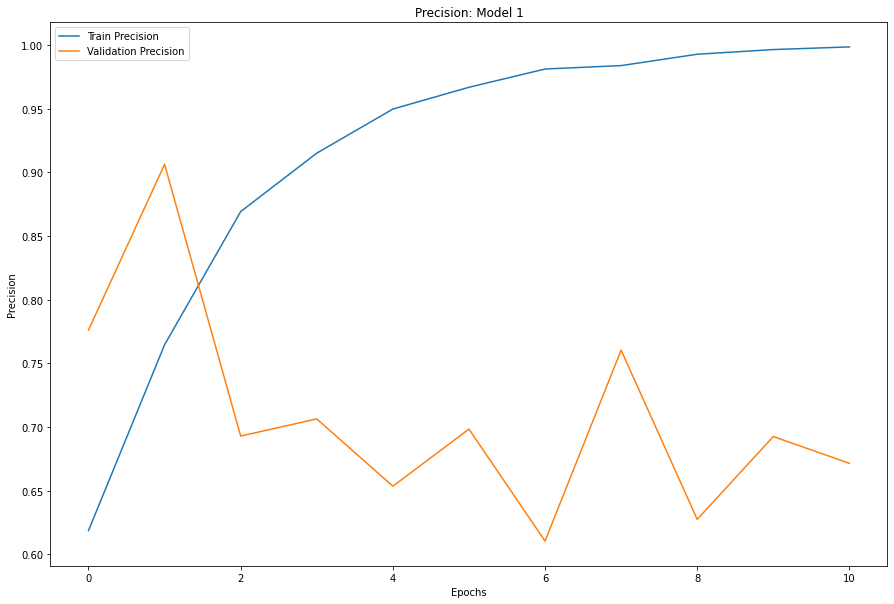

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['precision'], label='Train Precision')
plt.plot(history_1.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Model 1');

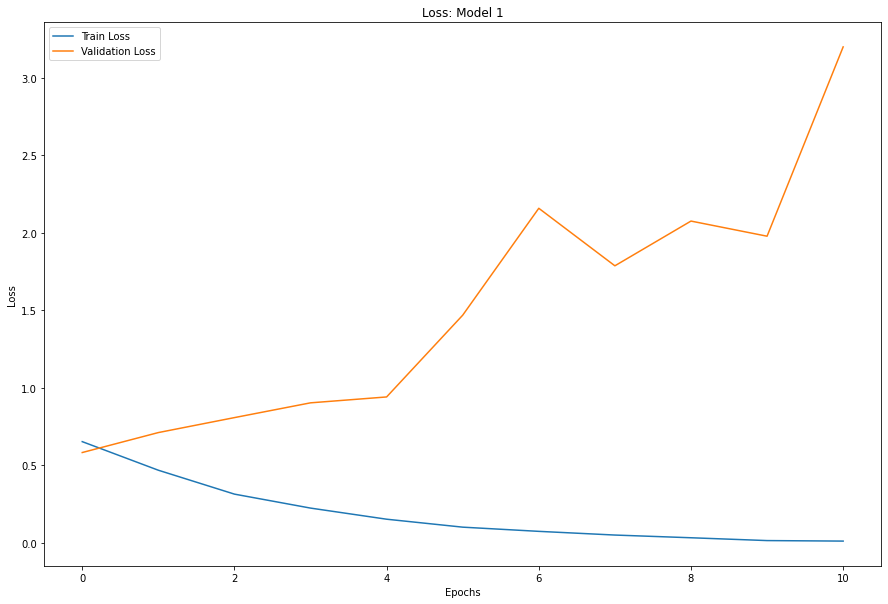

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss: Model 1');

In [ ]:
model1.evaluate(test)

24/24 [==============================] - 27s 1s/step - loss: 3.1976 - accuracy: 0.6804 - precision: 0.6715


[3.1976094245910645, 0.6803713440895081, 0.6714628338813782]

In [ ]:
model1_preds = model1.predict(test)

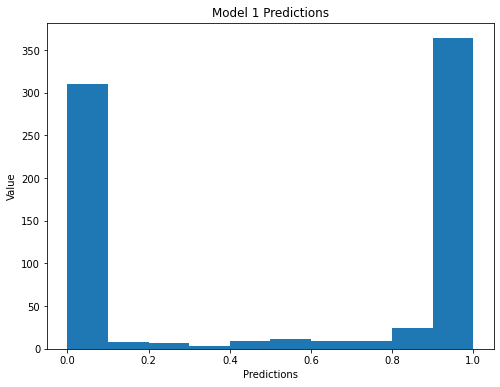

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Model 1 Predictions')
plt.xlabel('Predictions')
plt.ylabel('Value')
plt.hist(model1_preds);

### Model 2


In [6]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(45, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [7]:
model2.compile(
    optimizer= Adam(learning_rate=0.00001),
    loss='bce',
    metrics=['accuracy', 'Precision'])

In [8]:
model2_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                           ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = '/content/drive/MyDrive/Wildlife Capstone/callbacks/model2',
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      'model2.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
history_2 = model2.fit(train, 
                        validation_data = test, 
                        validation_batch_size=32, 
                        batch_size=32,
                        epochs=50, 
                        callbacks = [model2_callbacks],
                        verbose=1
                        )

Epoch 1/50
111/111 [==============================] - 1333s 12s/step - loss: 0.6889 - accuracy: 0.5370 - precision: 0.5399 - val_loss: 0.6986 - val_accuracy: 0.5093 - val_precision: 0.5093
Epoch 2/50
111/111 [==============================] - 817s 7s/step - loss: 0.6834 - accuracy: 0.5415 - precision: 0.5415 - val_loss: 0.6989 - val_accuracy: 0.5093 - val_precision: 0.5093
Epoch 3/50
111/111 [==============================] - 816s 7s/step - loss: 0.6779 - accuracy: 0.5463 - precision: 0.5457 - val_loss: 0.7011 - val_accuracy: 0.5093 - val_precision: 0.5093
Epoch 4/50
111/111 [==============================] - 817s 7s/step - loss: 0.6695 - accuracy: 0.5700 - precision: 0.5651 - val_loss: 0.6980 - val_accuracy: 0.4602 - val_precision: 0.4825
Epoch 5/50
111/111 [==============================] - 813s 7s/step - loss: 0.6574 - accuracy: 0.6047 - precision: 0.6046 - val_loss: 0.6965 - val_accuracy: 0.5385 - val_precision: 0.5381
Epoch 6/50
111/111 [==============================] - 810s 7s/s

In [ ]:
history_2.history

{'accuracy': [0.5367024540901184,
  0.5468661785125732,
  0.5417842864990234,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672],
 'loss': [0.6936467885971069,
  0.6881353855133057,
  0.6917256116867065,
  0.6907036304473877,
  0.6902180314064026,
  0.6899867653846741,
  0.6898585557937622,
  0.689805805683136,
  0.6897964477539062,
  0.689774215221405,
  0.6897769570350647,
  0.6897509098052979,
  0.6897469758987427],
 'precision': [0.5418555736541748,
  0.5459888577461243,
  0.5416548848152161,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672,
  0.5415019989013672],
 'val_accuracy': [0.5092838406562805,
  0.5092838406562805,
  0.5092838406562805,
  0.5092838406562805,
  0.

In [ ]:
# model2.save('/content/drive/MyDrive/Wildlife Capstone/models/model2')

In [ ]:
# model2.save_weights('/content/drive/MyDrive/Wildlife Capstone/models/model2_weights')

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_12 (Conv2D)          (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 dropout_2 (Dropout)         (None, 122, 122, 32)      0         
                                                      

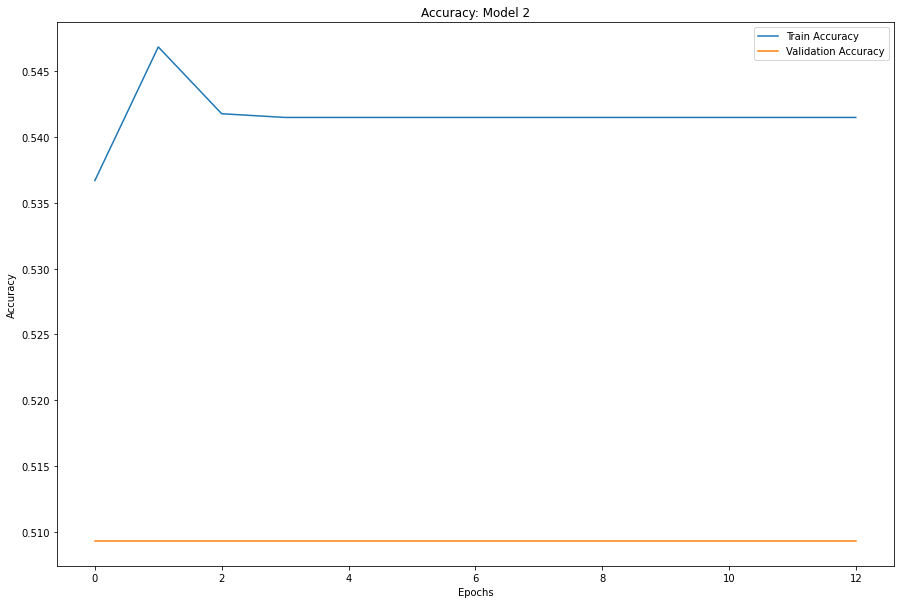

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Model 2');

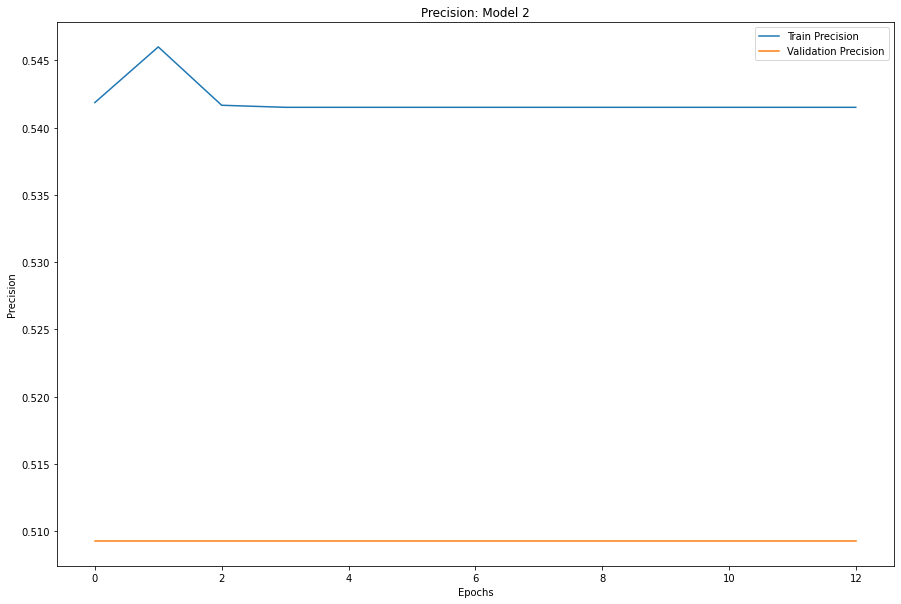

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['precision'], label='Train Precision')
plt.plot(history_2.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Model 2');

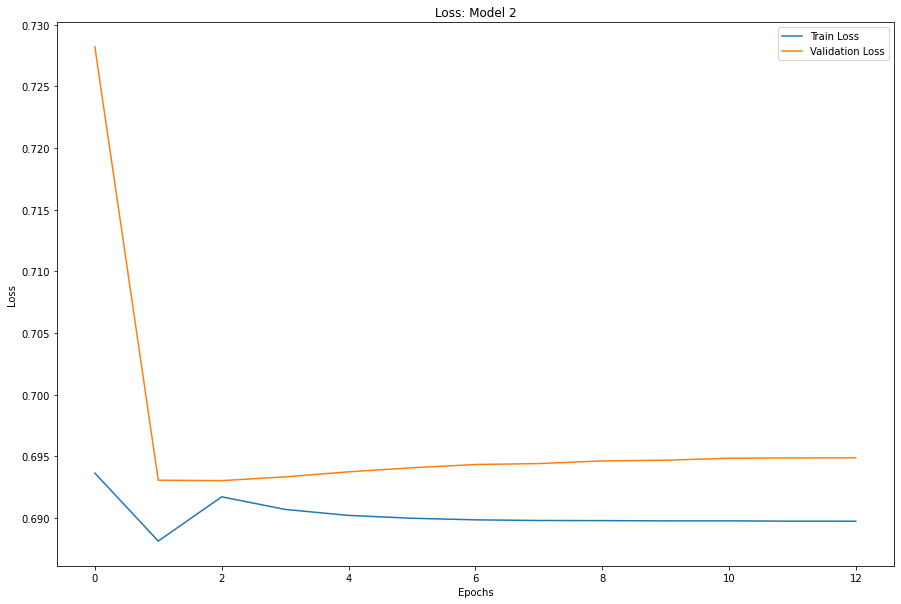

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: Model 2');

In [ ]:
model2.evaluate(test)

24/24 [==============================] - 27s 1s/step - loss: 0.6949 - accuracy: 0.5093 - precision: 0.5093


[0.6948861479759216, 0.5092838406562805, 0.5092838406562805]

In [ ]:
model2_preds = model2.predict(test)

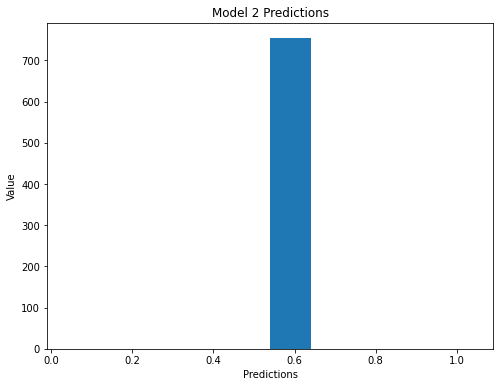

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Model 2 Predictions')
plt.xlabel('Predictions')
plt.ylabel('Value')
plt.hist(model2_preds);

### ResNet50V2 Model

In [ ]:
# https://www.tensorflow.org/guide/keras/transfer_learning
pre_model = tf.keras.applications.ResNet50V2(
    include_top=False, 
    weights='imagenet')

pre_model.trainable = False

resnet_model = Sequential()
resnet_model.add(pre_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Flatten())
resnet_model.add(Dense(48, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet_model_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                  ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = '/content/drive/MyDrive/Wildlife Capstone/callbacks/pre-trained_model',
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      'resnet_model.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
resnet_model.compile(optimizer= Adam(learning_rate=0.0001),
                     loss='bce',
                     metrics=['accuracy', 'Precision'])

In [ ]:
history_res = resnet_model.fit(
    train,
    validation_data = test,
    validation_batch_size=32,
    batch_size=32,
    epochs=50,
    callbacks=[resnet_model_callbacks], 
    verbose=1
)

Epoch 1/50
111/111 [==============================] - 209s 2s/step - loss: 0.5679 - accuracy: 0.6988 - precision: 0.7342 - val_loss: 0.4866 - val_accuracy: 0.7772 - val_precision: 0.7935
Epoch 2/50
111/111 [==============================] - 194s 2s/step - loss: 0.4647 - accuracy: 0.7843 - precision: 0.8447 - val_loss: 0.4562 - val_accuracy: 0.7798 - val_precision: 0.8028
Epoch 3/50
111/111 [==============================] - 193s 2s/step - loss: 0.4171 - accuracy: 0.8139 - precision: 0.8595 - val_loss: 0.4314 - val_accuracy: 0.7865 - val_precision: 0.8251
Epoch 4/50
111/111 [==============================] - 194s 2s/step - loss: 0.3799 - accuracy: 0.8413 - precision: 0.8879 - val_loss: 0.4555 - val_accuracy: 0.7865 - val_precision: 0.7896
Epoch 5/50
111/111 [==============================] - 194s 2s/step - loss: 0.3532 - accuracy: 0.8569 - precision: 0.8988 - val_loss: 0.4232 - val_accuracy: 0.8011 - val_precision: 0.8362
Epoch 6/50
111/111 [==============================] - 195s 2s/ste

In [ ]:
history_res.history

{'accuracy': [0.6987577676773071,
  0.7843026518821716,
  0.8139469027519226,
  0.8413325548171997,
  0.8568605184555054,
  0.8712591528892517,
  0.8865048289299011,
  0.8944099545478821,
  0.9045736789703369,
  0.910220205783844,
  0.9172783493995667,
  0.923771858215332,
  0.926595151424408,
  0.9342179298400879,
  0.9359118938446045],
 'loss': [0.5678809285163879,
  0.46474483609199524,
  0.41710564494132996,
  0.37991809844970703,
  0.3531808853149414,
  0.3302503824234009,
  0.30906084179878235,
  0.29160943627357483,
  0.2754417955875397,
  0.2601819336414337,
  0.24810492992401123,
  0.23640771210193634,
  0.22428123652935028,
  0.21382278203964233,
  0.2033698856830597],
 'precision': [0.7341772317886353,
  0.8446834087371826,
  0.8595088720321655,
  0.8878718614578247,
  0.8988128900527954,
  0.9102132320404053,
  0.9187845587730408,
  0.9293659329414368,
  0.9393770694732666,
  0.9395604133605957,
  0.946183443069458,
  0.95076584815979,
  0.9549944996833801,
  0.959128081798

In [ ]:
# resnet_model.save('/content/drive/MyDrive/Wildlife Capstone/models/resnet_model')

In [ ]:
# resnet_model.save_weights('/content/drive/MyDrive/Wildlife Capstone/models/resnet_model_weights')

In [ ]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 48)                98352     
                                                                 
 dense_13 (Dense)            (None, 1)                 49        
                                                                 
Total params: 23,663,201
Trainable params: 98,401
Non-trainable params: 23,564,800
_____________________________________

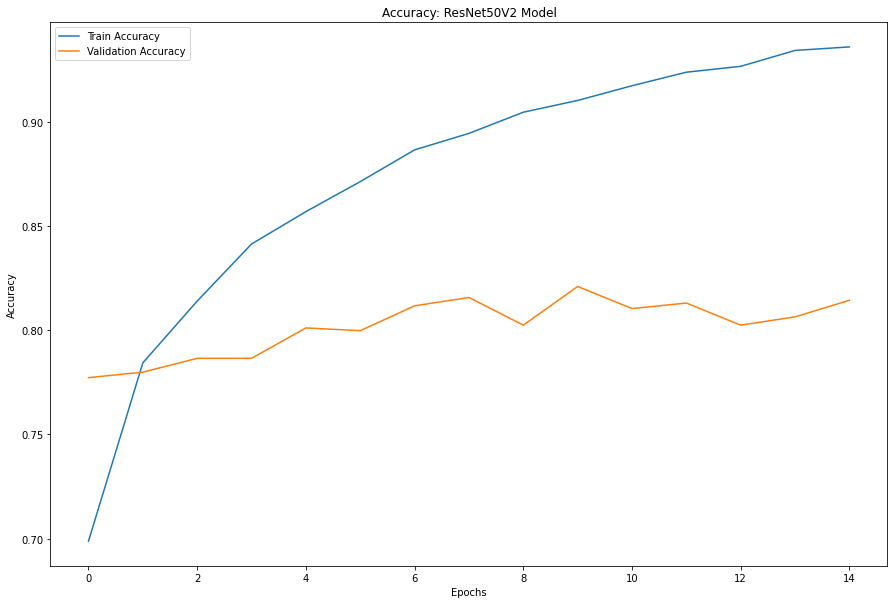

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['accuracy'], label='Train Accuracy')
plt.plot(history_res.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: ResNet50V2 Model');

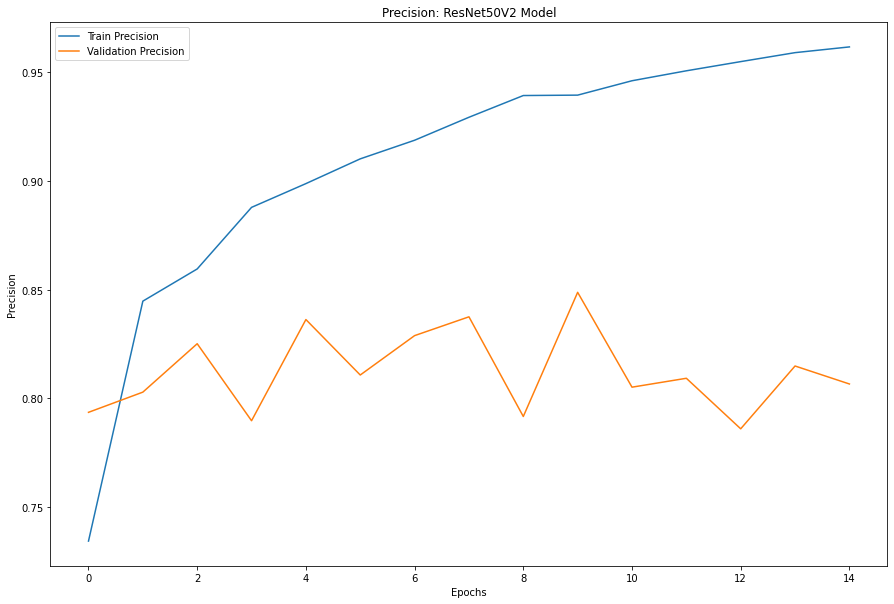

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['precision'], label='Train Precision')
plt.plot(history_res.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: ResNet50V2 Model');

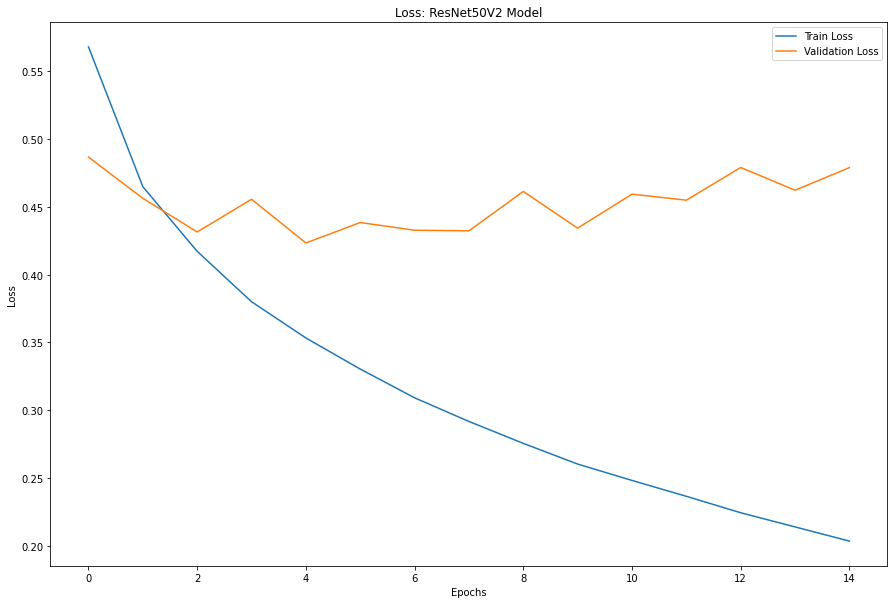

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['loss'], label='Train Loss')
plt.plot(history_res.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: ResNet50V2 Model');

In [ ]:
resnet_model.evaluate(test)

24/24 [==============================] - 29s 1s/step - loss: 0.4788 - accuracy: 0.8143 - precision: 0.8065


[0.4788340628147125, 0.8143236041069031, 0.8065326809883118]

In [ ]:
resnet_preds = resnet_model.predict(test)

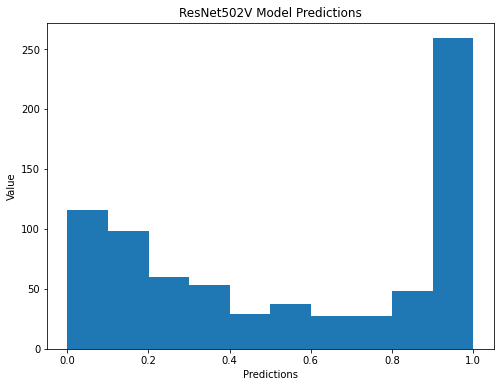

In [ ]:
plt.figure(figsize=(8,6))
plt.title('ResNet502V Model Predictions')
plt.xlabel('Predictions')
plt.ylabel('Value')
plt.hist(resnet_preds);

### Model Comparison

#### Validation Accuracy

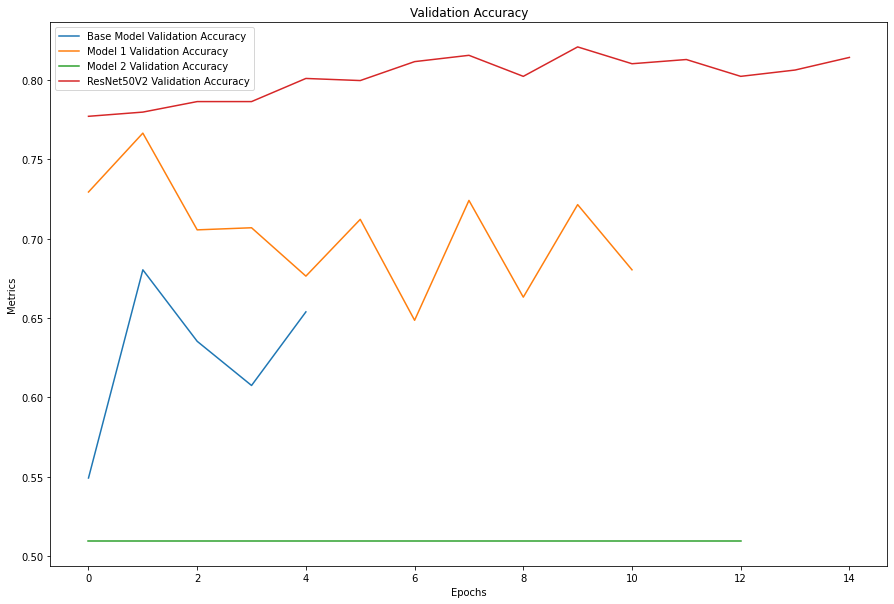

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.plot(history_res.history['val_accuracy'], label='ResNet50V2 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy');

#### Validation Precision

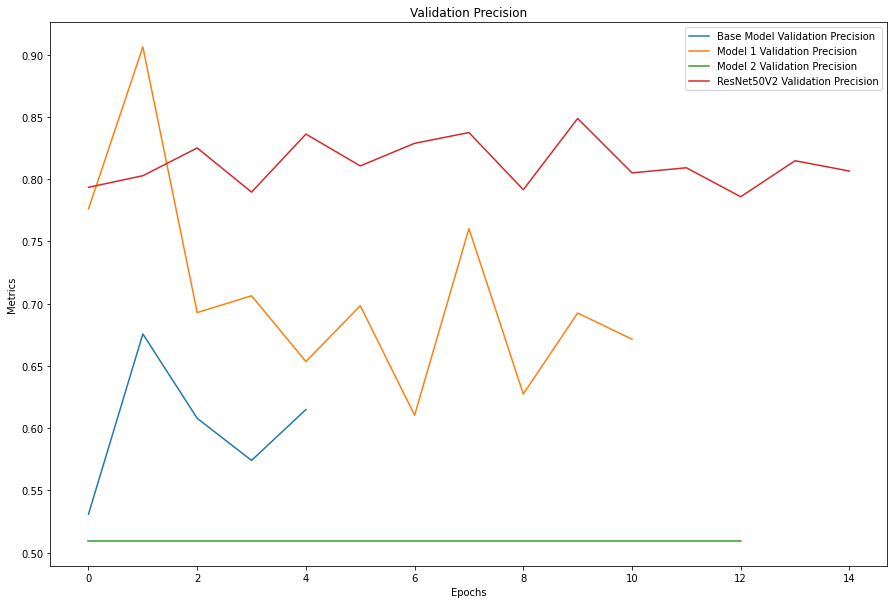

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_precision'], label='Base Model Validation Precision')
plt.plot(history_1.history['val_precision'], label='Model 1 Validation Precision')
plt.plot(history_2.history['val_precision'], label='Model 2 Validation Precision')
plt.plot(history_res.history['val_precision'], label='ResNet50V2 Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Validation Precision');

#### Validation Loss

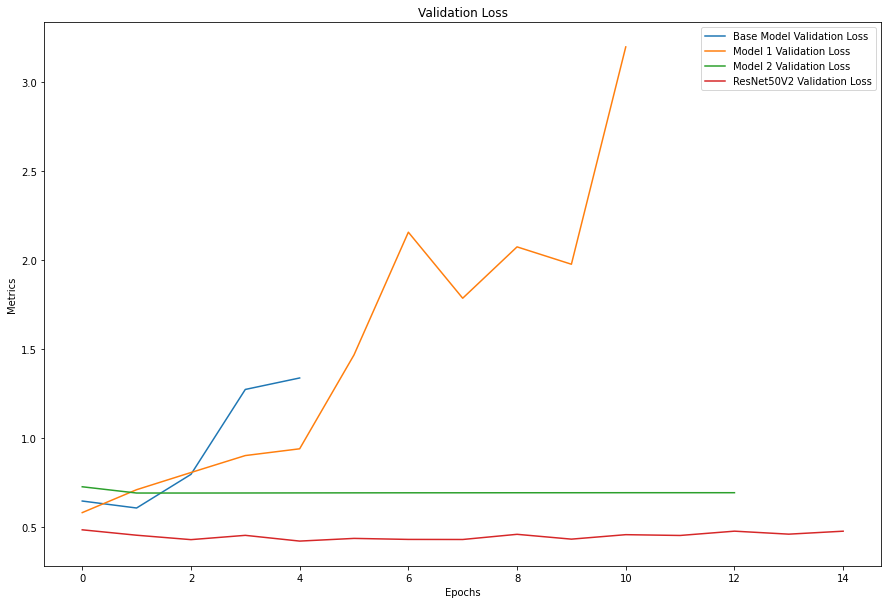

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_loss'], label='Base Model Validation Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss')
plt.plot(history_res.history['val_loss'], label='ResNet50V2 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('binary Cross Entropy')
plt.legend()
plt.title('Validation Loss');

#### Comparison Table: Evaluated Metrics on Test Set

|Model|Evaluated Accuracy|Evaluated Precision|Evaluated Loss|
|----|----|----|----|
|Base Model|0.6538|0.6150|1.3390|
|Model 1|0.6804|0.6715|3.1976|
|Model 2 |0.5093|0.5093|0.6949|
|ResNet50V2|0.8143|0.8065|0.4788|


### Best Model

The best model of the four is definitely the ResNet50V2 model, because it had the best scores for accuracy, precision, and loss, even though its predictions weren't as good as the predictions from model 1.

### Conclusions

The three built models showed a lot of underfitting and in some models there were signs showing a lack of sufficient data to properly train the model. 

The pretrained ResNet502V model did significantly better than the other three when evaluated on the test set. 

The ResNet502V model outperformed the others.


### Code Credit:

7.05 Lesson CNNs 
  - Processing Images
  - CNN

7.06 Transfer Learning

https://keras.io/examples/vision/image_classification_from_scratch/

https://www.tensorflow.org/tutorials/images/classification


https://keras.io/api/applications/

https://keras.io/api/applications/resnet/#resnet50v2-function

https://keras.io/guides/transfer_learning/

https://keras.io/api/models/

https://www.tensorflow.org/guide/keras/save_and_serialize

https://stackoverflow.com/questions/49969006/save-and-load-keras-callbacks-history

https://stackoverflow.com/questions/47843265/how-can-i-get-a-keras-models-history-after-loading-it-from-a-file-in-python

https://keras.io/api/callbacks/

https://keras.io/api/callbacks/model_checkpoint/

https://keras.io/api/callbacks/csv_logger/


https://www.tensorflow.org/guide/keras/transfer_learning
